In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# task1

In [3]:
bike_df=pd.read_csv('DS1_C9_S2_Practice_BikeSales_Data.csv')
bike_df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950
1,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950
2,02-08-2013,2,August,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5.0,45,120.0,369.0,225.0,594
3,02-08-2015,2,August,2015,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,7.0,45,120.0,517.0,315.0,832
4,02-09-2013,2,September,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,2.0,45,120.0,148.0,90.0,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,18-02-2014,18,February,2014,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,13.0,2,5.0,38.0,26.0,64
496,18-02-2016,18,February,2016,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,31.0,2,5.0,91.0,62.0,153
497,18-02-2016,18,February,2016,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,11.0,2,5.0,32.0,22.0,54
498,04-03-2014,4,March,2014,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,5.0,2,5.0,15.0,10.0,25


In [7]:
bike_df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [9]:
bike_df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      5
Unit_Cost           0
Unit_Price          3
Profit              2
Cost                2
Revenue             0
dtype: int64

In [11]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              500 non-null    object 
 1   Day               500 non-null    int64  
 2   Month             500 non-null    object 
 3   Year              500 non-null    int64  
 4   Customer_Age      500 non-null    int64  
 5   Age_Group         500 non-null    object 
 6   Customer_Gender   500 non-null    object 
 7   Country           500 non-null    object 
 8   State             500 non-null    object 
 9   Product_Category  500 non-null    object 
 10  Sub_Category      500 non-null    object 
 11  Product           500 non-null    object 
 12  Order_Quantity    495 non-null    float64
 13  Unit_Cost         500 non-null    int64  
 14  Unit_Price        497 non-null    float64
 15  Profit            498 non-null    float64
 16  Cost              498 non-null    float64
 1

In [13]:
bike_df['Order_Quantity']=bike_df['Order_Quantity'].fillna(bike_df['Order_Quantity'].mean())

In [15]:
bike_df['Unit_Price']=bike_df['Unit_Price'].fillna(bike_df['Unit_Price'].mean())

In [17]:
bike_df['Profit']=bike_df['Profit'].fillna(bike_df['Profit'].mean())

In [19]:
bike_df['Cost']=bike_df['Cost'].fillna(bike_df['Cost'].mean())

In [21]:
bike_df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [23]:
df=bike_df[['Order_Quantity','Unit_Cost','Unit_Price','Customer_Age','Revenue']]
df

,Order_Quantity,Unit_Cost,Unit_Price,Customer_Age,Revenue
0,8.0,45,120.0,19,950
1,8.0,45,120.0,19,950
2,5.0,45,120.0,29,594
3,7.0,45,120.0,29,832
4,2.0,45,120.0,29,238
...,...,...,...,...,...
495,13.0,2,5.0,37,64
496,31.0,2,5.0,37,153
497,11.0,2,5.0,37,54
498,5.0,2,5.0,37,25


In [25]:
df.describe()

,Order_Quantity,Unit_Cost,Unit_Price,Customer_Age,Revenue
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13.375758,16.548000,43.601610,36.588000,343.216000
std,9.202695,21.759473,58.168836,11.363649,556.346929
min,1.000000,2.000000,5.000000,17.000000,5.000000
25%,5.000000,2.000000,5.000000,31.000000,69.000000
50%,12.000000,3.000000,9.000000,35.000000,129.000000
75%,22.000000,45.000000,120.000000,42.000000,272.000000
max,32.000000,59.000000,159.000000,73.000000,3564.000000


In [27]:
def iqr(df):
    df_out=df
    col_to_treat=df.columns
    for col in col_to_treat:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        uf=q3+1.5*iqr
        lf=q1-1.5*iqr
        df_out.loc[df_out[col]>uf,col]=uf
        df_out.loc[df_out[col]<lf,col]=lf
    return df_out

In [29]:
treat_df=iqr(df)
treat_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20792\2764937911.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '109.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_out.loc[df_out[col]>uf,col]=uf
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20792\2764937911.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '58.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_out.loc[df_out[col]>uf,col]=uf
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20792\2764937911.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '576.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_out.loc[df_out[col]>uf,col]=uf


,Order_Quantity,Unit_Cost,Unit_Price,Customer_Age,Revenue
0,8.0,45.0,120.0,19.0,576.5
1,8.0,45.0,120.0,19.0,576.5
2,5.0,45.0,120.0,29.0,576.5
3,7.0,45.0,120.0,29.0,576.5
4,2.0,45.0,120.0,29.0,238.0
...,...,...,...,...,...
495,13.0,2.0,5.0,37.0,64.0
496,31.0,2.0,5.0,37.0,153.0
497,11.0,2.0,5.0,37.0,54.0
498,5.0,2.0,5.0,37.0,25.0


In [31]:
# task2
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
scaled_df=pd.DataFrame(df_scaled,columns=treat_df.columns)
scaled_df

,Order_Quantity,Unit_Cost,Unit_Price,Customer_Age,Revenue
0,-0.584735,1.308878,1.314706,-1.634155,1.826079
1,-0.584735,1.308878,1.314706,-1.634155,1.826079
2,-0.911053,1.308878,1.314706,-0.687477,1.826079
3,-0.693508,1.308878,1.314706,-0.687477,1.826079
4,-1.237371,1.308878,1.314706,-0.687477,0.136684
...,...,...,...,...,...
495,-0.040872,-0.669252,-0.664278,0.069865,-0.731720
496,1.917035,-0.669252,-0.664278,0.069865,-0.287537
497,-0.258417,-0.669252,-0.664278,0.069865,-0.781629
498,-0.911053,-0.669252,-0.664278,0.069865,-0.926363


In [15]:
# task3

In [33]:

corr=scaled_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Order_Quantity,Unit_Cost,Unit_Price,Customer_Age,Revenue
Order_Quantity,1.000000,-0.444709,-0.443808,-0.063510,-0.070528
Unit_Cost,-0.444709,1.000000,0.994782,0.118458,0.815590
Unit_Price,-0.443808,0.994782,1.000000,0.116787,0.804100
Customer_Age,-0.063510,0.118458,0.116787,1.000000,0.096247
Revenue,-0.070528,0.815590,0.804100,0.096247,1.000000


<Axes: >

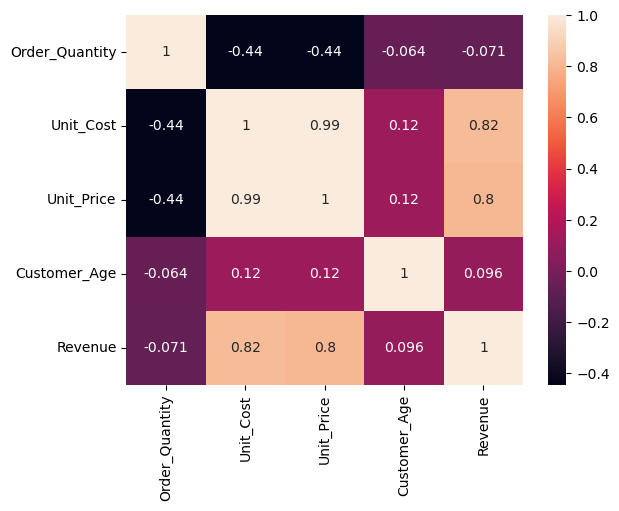

In [35]:
sns.heatmap(corr,annot=True)

In [37]:
sorted_corr=df.corr()[['Revenue']].sort_values('Revenue')
sorted_corr

,Revenue
Order_Quantity,-0.070528
Customer_Age,0.096247
Unit_Price,0.804100
Unit_Cost,0.815590
Revenue,1.000000


In [19]:
# unit cost has maximum correlation compare to others
# reject all columns except unit_cost

In [39]:
col_to_drop=scaled_df[['Order_Quantity','Customer_Age','Unit_Price']]
df_selected_col=scaled_df.drop(col_to_drop,axis=1)
df_selected_col

,Unit_Cost,Revenue
0,1.308878,1.826079
1,1.308878,1.826079
2,1.308878,1.826079
3,1.308878,1.826079
4,1.308878,0.136684
...,...,...
495,-0.669252,-0.731720
496,-0.669252,-0.287537
497,-0.669252,-0.781629
498,-0.669252,-0.926363


<Axes: xlabel='Unit_Cost', ylabel='Revenue'>

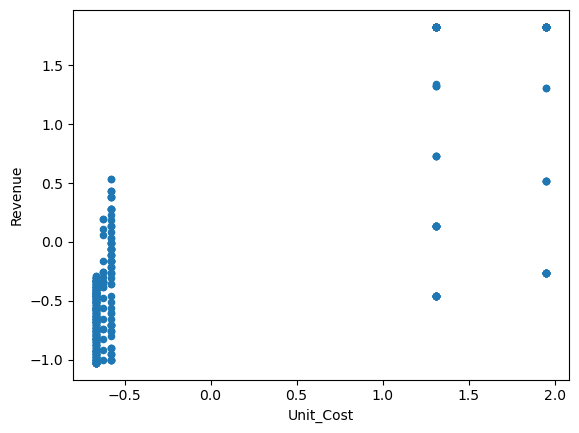

In [41]:
df_selected_col.plot.scatter(x='Unit_Cost',y='Revenue')

In [45]:
X=np.array(df_selected_col['Unit_Cost']).reshape(-1,1)
y=np.array(df_selected_col['Revenue'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [47]:
s_model=LinearRegression().fit(X_train,y_train)


In [49]:
print('intercept',s_model.intercept_)
print('slope',s_model.coef_)

intercept 0.005248078333748133
slope [0.80356697]


In [51]:
y_predict=s_model.predict(X_test)
y_predict

array([ 1.0570192 , -0.5325407 , -0.5325407 , -0.5325407 , -0.5325407 ,
        1.0570192 , -0.45860768, -0.5325407 , -0.45860768, -0.45860768,
       -0.5325407 , -0.5325407 , -0.45860768, -0.5325407 , -0.5325407 ,
       -0.45860768, -0.5325407 , -0.5325407 , -0.45860768,  1.0570192 ,
       -0.49557419, -0.5325407 , -0.5325407 ,  1.57455032,  1.0570192 ,
       -0.5325407 ,  1.0570192 , -0.5325407 ,  1.0570192 , -0.5325407 ,
       -0.5325407 ,  1.57455032,  1.57455032, -0.49557419, -0.5325407 ,
       -0.5325407 , -0.45860768, -0.5325407 , -0.5325407 , -0.5325407 ,
       -0.45860768,  1.0570192 , -0.45860768, -0.5325407 ,  1.0570192 ,
        1.0570192 , -0.49557419, -0.45860768, -0.5325407 ,  1.0570192 ,
       -0.5325407 , -0.5325407 , -0.5325407 ,  1.57455032,  1.57455032,
        1.0570192 , -0.45860768, -0.5325407 , -0.5325407 , -0.5325407 ,
        1.0570192 , -0.5325407 , -0.45860768, -0.5325407 , -0.5325407 ,
       -0.49557419,  1.0570192 , -0.5325407 , -0.5325407 ,  1.05

In [26]:
# task4

In [53]:

MSE= mean_squared_error(y_test,y_predict)
print('MSE',MSE)
MAE= mean_absolute_error(y_test,y_predict)
print('MAE',MAE)
RSME=mean_squared_error(y_test,y_predict,squared=False)
print('RMSE',RSME)
R2=r2_score(y_test,y_predict)
print("R2",R2)

MSE 0.2673525448879326
MAE 0.39679646809400393
RMSE 0.5170614517520452
R2 0.7059920717906476


C:\Users\ASUS\hridhthik-python\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [55]:
def calculate_residuals(model, features, label):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual'])-abs(df_results['Predicted'])
    return df_results

def linear_assumption(model, features, label):
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')  
    print('Checking with a scatter plot of actual vs. predicted.','Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()
    

    
    
        

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


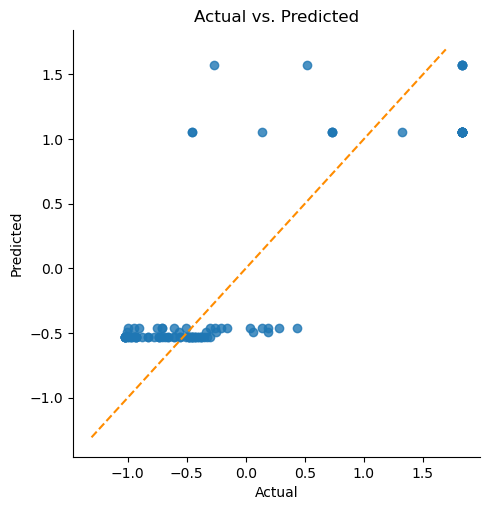

In [59]:
linear_assumption(s_model,X_test,y_test)

In [73]:
def homo(model,feature,label):
    df_result=calculate_residuals(model,feature,label)
    plt.scatter(df_result.index,df_result['Residuals'],color='green')
    plt.plot(np.repeat(0,df_result.index.max()),color='red',ls='--')

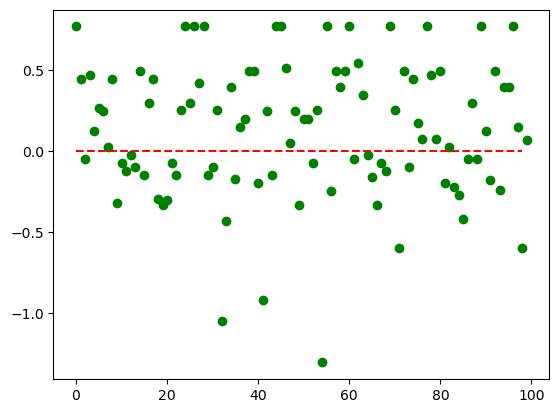

In [75]:
homo(s_model,X_test,y_test)

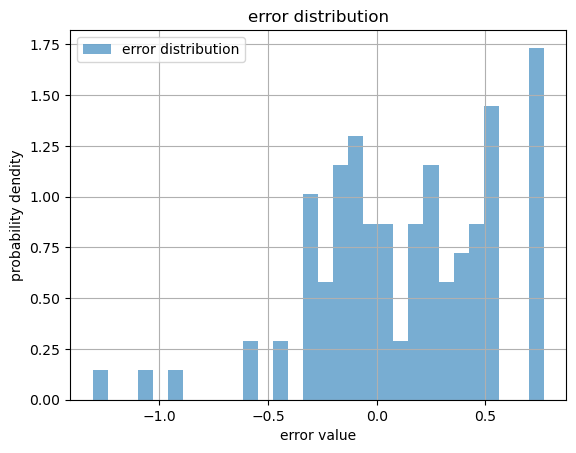

In [77]:
df_results=calculate_residuals(s_model,X_test,y_test)
plt.hist(df_results.Residuals,bins=30,label='error distribution',alpha=0.6,density=True)
plt.xlabel('error value')
plt.ylabel('probability dendity')
plt.title('error distribution')
plt.grid(True)
plt.legend()
plt.show()

# conclusion
Model Performance Overview:

The R² score (0.706) indicates that the model explains ~70.6% of the variance in the target variable.
While this is a decent score, there is still room for improvement.
Error Analysis:

MSE (0.2673), RMSE (0.5171), and MAE (0.3968) show that the model has moderate prediction errors.
RMSE > MAE suggests that larger errors have a greater impact, indicating the presence of outliers or extreme values.
Insights from Visualizations:

Actual vs. Predicted Plot:

Many predicted values deviate from the ideal diagonal line, indicating a lack of perfect alignment.
The model struggles with certain predictions, possibly due to underfitting or missing key features.
Residual Plot (Homoscedasticity Check):

The residuals appear randomly distributed, which is a good sign.
However, some extreme residuals suggest that certain observations are not well predicted, possibly due to noise or missing important features.
Error Distribution Plot:

The distribution of errors appears multimodal, meaning there might be underlying subgroups in the data that the model is not capturing well.
There are some large error values, which could indicate outliers that need further investigation.